In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read in the data
df = pd.read_csv('/Users/changyichieh/Documents/Hot Jupiter/Hot_Jupiter_Github/hot_jupiter/Parmentier 2/PTprofile(20bar)(Hd209458b)(0103).csv')
df['T(K)']

0     1706.2
1     1705.6
2     1704.8
3     1703.8
4     1702.6
5     1701.1
6     1699.4
7     1697.2
8     1694.6
9     1691.5
10    1687.8
11    1683.5
12    1678.3
13    1672.4
14    1665.6
15    1658.1
16    1649.8
17    1641.1
18    1632.2
19    1623.9
20    1616.6
21    1611.3
22    1609.1
23    1610.8
24    1617.3
25    1629.2
26    1646.3
27    1667.9
28    1692.5
29    1718.7
30    1745.3
31    1771.2
32    1795.9
33    1819.5
34    1842.3
35    1864.5
36    1885.9
37    1905.6
38    1922.3
39    1935.3
40    1944.0
41    1949.1
42    1951.7
43    1952.9
44    1953.7
45    1954.3
46    1955.0
47    1955.9
48    1957.0
49    1958.5
50    1960.5
51    1963.2
52    1966.8
53    1971.7
54    1978.4
55    1987.4
56    1999.6
57    2016.1
58    2038.4
59    2068.5
Name: T(K), dtype: float64

$$
\epsilon^{\prime}(\lambda, \phi, \sigma)=\sum_i \frac{\pi}{2} \beta_{\mathrm{v} i} \sqrt{3} \gamma_{\mathrm{v} i} \kappa_R \sigma_B T_{i r r}^4 \exp \left(-\sqrt{3} \gamma_{\mathrm{v} i} \tau\right) \cos \phi \exp (\mathrm{i} \lambda)
$$

In [2]:

sigma_b = 5.67037442e-8
beta_1,beta_2,beta_3 = df['Betav1'],df['Betav2'],df['Betav3']
gv_1,gv_2,gv_3 = df['Gv1'],df['Gv2'],df['Gv3']
tau = df['tau']
kappa_R = df['Kappa(m^2/kg)']
T_irr = df['T_irr(K)']

# calculate the source 
df['epsilon(tau)'] = np.pi/2*beta_1*np.sqrt(3)*gv_1*kappa_R*sigma_b*T_irr**4*np.exp(-np.sqrt(3)*gv_1*tau)+\
                     np.pi/2*beta_2*np.sqrt(3)*gv_2*kappa_R*sigma_b*T_irr**4*np.exp(-np.sqrt(3)*gv_2*tau)+\
                    np.pi/2*beta_3*np.sqrt(3)*gv_3*kappa_R*sigma_b*T_irr**4*np.exp(-np.sqrt(3)*gv_3*tau)


# # make it be a 3D profile by considering lambda and phi
# N_lambda = 32
# N_phi = 32

# # Initialize an empty array for the 3D profile
# epsilon_prime = np.zeros((N_lambda, N_phi, len(df['epsilon(tau)'])))

# lambda_values = np.linspace(0, 2*np.pi, N_lambda)  # lambda ranges from 0 to 2*pi
# phi_values = np.linspace(0, np.pi, N_phi)         # phi ranges from 0 to pi


# # Calculate the 3D profile
# for i, lambda_ in enumerate(lambda_values):
#     for j, phi in enumerate(phi_values):
#         epsilon_prime[i, j, :] = df['epsilon(tau)'] * np.cos(phi) * np.exp(1j * lambda_)

# epsilon_prime

$$
\Gamma_0 \equiv \dfrac{R T_0}{c_p \sigma}-\dfrac{d T_0 }{d \sigma}
$$

In [3]:
T = df['T(K)']
cp = 12330.08474
sigma = df['sigma']
R = df['R(J/(K*g))']

# calculate the temperature gradient base on the sigma
# use central difference
df['dT/dsigma'] = (df['T(K)'].shift(-1) - df['T(K)'].shift(1))/(df['sigma'].shift(-1) - df['sigma'].shift(1))
# for the first and last row, use forward and backward difference
df['dT/dsigma'][0] = (df['T(K)'][1] - df['T(K)'][0])/(df['sigma'][1] - df['sigma'][0])
df['dT/dsigma'][len(df)-1] = (df['T(K)'][len(df)-1] - df['T(K)'][len(df)-2])/(df['sigma'][len(df)-1] - df['sigma'][len(df)-2])

# # check the temperature gradient
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))
# ax1.plot(df['dT/dsigma'], df['sigma'])
# ax1.set_xlabel('dT/dsigma')
# ax1.set_ylabel('sigma')
# ax1.set_yscale('log')
# ax1.set_title('sigma vs dT/dsigma')
# ax1.invert_yaxis()

# ax2.plot(T, sigma)
# ax2.set_xlabel('T(K)')
# ax2.set_ylabel('sigma')
# ax2.set_yscale('log')
# ax2.set_title('sigma vs T(K)')
# ax2.invert_yaxis()

# plt.tight_layout()
# plt.show()


# calculate gamma0
df['gamma_0'] = -df['dT/dsigma']+R/cp*T/df['sigma']

/var/folders/23/rfr22z5x0bd1z52b78mb8bmm0000gn/T/ipykernel_56326/262850172.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dT/dsigma'][0] = (df['T(K)'][1] - df['T(K)'][0])/(df['sigma'][1] - df['sigma'][0])
/var/folders/23/rfr22z5x0bd1z52b78mb8bmm0000gn/T/ipykernel_56326/262850172.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dT/dsigma'][len(df)-1] = (df['T(K)'][len(df)-1] - df['T(K)'][len(df)-2])/(df['sigma'][len(df)-1] - df['sigma'][len(df)-2])


In [4]:
df['epsilon(tau)/gamma_0'] = df['epsilon(tau)']/df['gamma_0']

/var/folders/23/rfr22z5x0bd1z52b78mb8bmm0000gn/T/ipykernel_56326/283015989.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['d(epsilon(tau)/gamma_0)/dsigma'][0] = (df['epsilon(tau)/gamma_0'][1] - df['epsilon(tau)/gamma_0'][0])/(df['sigma'][1] - df['sigma'][0])
/var/folders/23/rfr22z5x0bd1z52b78mb8bmm0000gn/T/ipykernel_56326/283015989.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['d(epsilon(tau)/gamma_0)/dsigma'][len(df)-1] = (df['epsilon(tau)/gamma_0'][len(df)-1] - df['epsilon(tau)/gamma_0'][len(df)-2])/(df['sigma'][len(df)-1] - df['sigma'][len(df)-2])


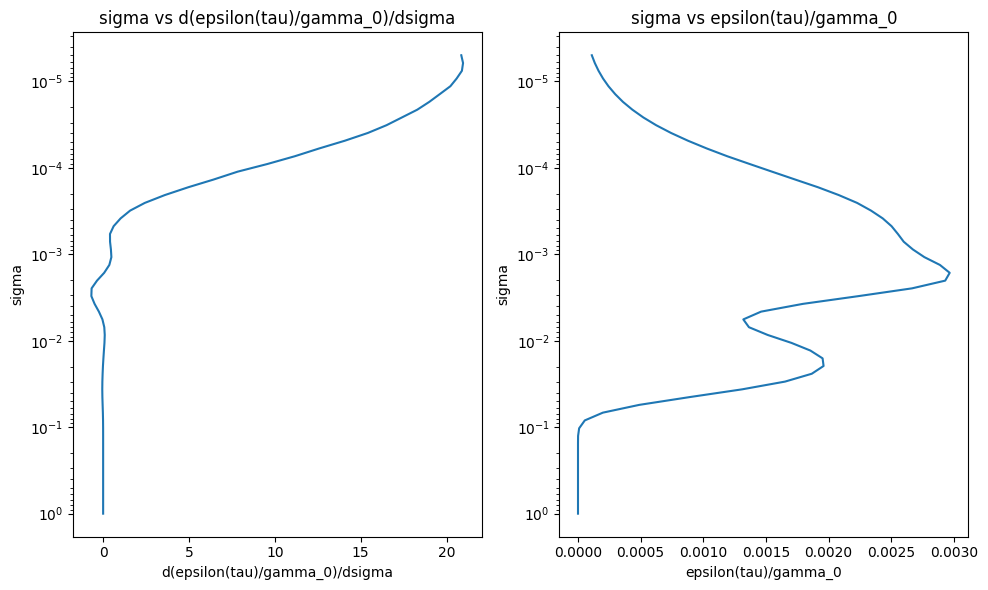

In [5]:
# calculate the gradient of epsilon(tau)/gamma_0 with respect to sigma
# use central difference
df['d(epsilon(tau)/gamma_0)/dsigma'] = (df['epsilon(tau)/gamma_0'].shift(-1) - df['epsilon(tau)/gamma_0'].shift(1))/(df['sigma'].shift(-1) - df['sigma'].shift(1))
# for the first and last row, use forward and backward difference
df['d(epsilon(tau)/gamma_0)/dsigma'][0] = (df['epsilon(tau)/gamma_0'][1] - df['epsilon(tau)/gamma_0'][0])/(df['sigma'][1] - df['sigma'][0])
df['d(epsilon(tau)/gamma_0)/dsigma'][len(df)-1] = (df['epsilon(tau)/gamma_0'][len(df)-1] - df['epsilon(tau)/gamma_0'][len(df)-2])/(df['sigma'][len(df)-1] - df['sigma'][len(df)-2])

# check the gradient of epsilon(tau)/gamma_0 with respect to sigma
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))
ax1.plot(df['d(epsilon(tau)/gamma_0)/dsigma'], df['sigma'])
ax1.set_xlabel('d(epsilon(tau)/gamma_0)/dsigma')
ax1.set_ylabel('sigma')
ax1.set_yscale('log')
ax1.set_title('sigma vs d(epsilon(tau)/gamma_0)/dsigma')
ax1.invert_yaxis()

ax2.plot(df['epsilon(tau)/gamma_0'], df['sigma'])
ax2.set_xlabel('epsilon(tau)/gamma_0')
ax2.set_ylabel('sigma')
ax2.set_yscale('log')
ax2.set_title('sigma vs epsilon(tau)/gamma_0')
ax2.invert_yaxis()

plt.tight_layout()
plt.show()


$$
-\dfrac{1}{c_p}\dfrac{\partial}{\partial \sigma}\left( \dfrac{\epsilon_f}{\Gamma_0} \right)
$$

In [6]:
df['forced_perturbation'] = -1/cp*df['d(epsilon(tau)/gamma_0)/dsigma']

In [7]:
N_lambda = 96
N_phi = 48

# Initialize an empty array for the 3D profile
epsilon_prime = np.zeros((N_lambda, N_phi, len(df['forced_perturbation'])))

lambda_values = np.linspace(0, 2*np.pi, N_lambda)  # lambda ranges from 0 to 2*pi
phi_values = np.linspace(0.5*np.pi, -0.5*np.pi, N_phi)         # phi ranges from 0 to pi

# Calculate the 3D profile
for i, lambda_ in enumerate(lambda_values):
    for j, phi in enumerate(phi_values):
        epsilon_prime[i, j, :] = df['forced_perturbation'] * np.cos(phi) * np.exp(1j * lambda_)

epsilon_prime.shape

/opt/homebrew/lib/python3.11/site-packages/pandas/core/series.py:893: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(self._values, dtype)


(96, 48, 60)

In [12]:
# store the 3D profile with slices:
# format :
# Dimensions: 60 96 48

# 60 slices
# 96 rows
# 48 columns

with open('epsilon_prime_3D_profile.txt', 'w') as f:
    f.write('Dimensions: 60 96 48\n')
    for i in range(60):
        f.write('Slice: ' + str(i+1) + '\n')
        for j in range(96):
            for k in range(48):
                f.write(str(epsilon_prime[j,k,i]) + ' ')
            f.write('\n')
        # f.write('\n')
    f.close()

In [8]:
# store the stability profile from bottom to top : 1D
stability_profile = np.zeros(len(df['forced_perturbation']))
for i in range(len(df['forced_perturbation'])):
    stability_profile[i] = df['gamma_0'][len(df['forced_perturbation'])-1-i]

# save the stability profile to a txt file line by line
np.savetxt('stability_profile.txt', stability_profile, delimiter='\n')

In [9]:
sigma = df['sigma']
# store the sigma profile from bottom to top : 1D
sigma_profile = np.zeros(len(df['forced_perturbation']))
for i in range(len(df['forced_perturbation'])):
    sigma_profile[i] = df['sigma'][len(df['forced_perturbation'])-1-i]

# save the sigma profile to a txt file line by line
np.savetxt('sigma_profile.txt', sigma_profile, delimiter='\n')